In [21]:
# script to get and plot TTS for rf06 with varying bl conditions
# date created: 2/17/2020
# author: sofia chelpon

In [22]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/mnt/home/sofia/TTS/paper_2020/base_tts_code/')
import tts_mod

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.103013,0.046404,0.021742,0.039795,0.030344,0.151337,0.212918,0.211608,0.038685,0.255669,0.085645,0.045282,NaN
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.019572,NaN,NaN,0.030263,0.013813,0.019185,0.004987,NaN,0.123489,0.012411,NaN,NaN,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.186828,NaN,NaN,0.177102,0.056251,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.198149,NaN,NaN,0.148701,0.077807,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.185409,0.366607,0.152887,0.172729,0.058991,0.487147,0.168560,0.459024,1.267391,0.449556,0.027565,0.304431,NaN


In [27]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [27]:
# --------------- ver 1: LOD REPLACE =LOD 
# read in ratios dataframe
path = "/mnt/home/sofia/TTS/paper_2020/contrast_readin/toga_lodhalf/testing_lod_treatments/contrast_ratios_lod_replace_lod.pkl"
contrast_ratios = pd.read_pickle(path)

# sort 
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
utbl_lod = ratios_sort['All RF'].values
tau_lod = ratios_sort['BL_tau'].values

t_lod, exp_decay_matrix_lod, LT_lod = tts_mod.prep_for_tts(tau_lod)
my_mustar_lod, my_r2_lod, my_gf_lod, my_t_lod, mean_age_lod, \
    mode_age_lod = tts_mod.get_tts(utbl_lod, tau_lod, t_lod, \
                                     exp_decay_matrix_lod, LT_lod)

In [28]:
# --------------- ver 1: LOD REPLACE =ZERO 
# read in ratios dataframe
path = "/mnt/home/sofia/TTS/paper_2020/contrast_readin/toga_lodhalf/testing_lod_treatments/contrast_ratios_lod_replace_zero.pkl"
contrast_ratios = pd.read_pickle(path)

# sort 
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
utbl_zero = ratios_sort['All RF'].values
tau_zero = ratios_sort['BL_tau'].values

t_zero, exp_decay_matrix_zero, LT_zero = tts_mod.prep_for_tts(tau_zero)
my_mustar_zero, my_r2_zero, my_gf_zero, my_t_zero, mean_age_zero, \
    mode_age_zero = tts_mod.get_tts(utbl_zero, tau_zero, t_zero, \
                                     exp_decay_matrix_zero, LT_zero)

In [29]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

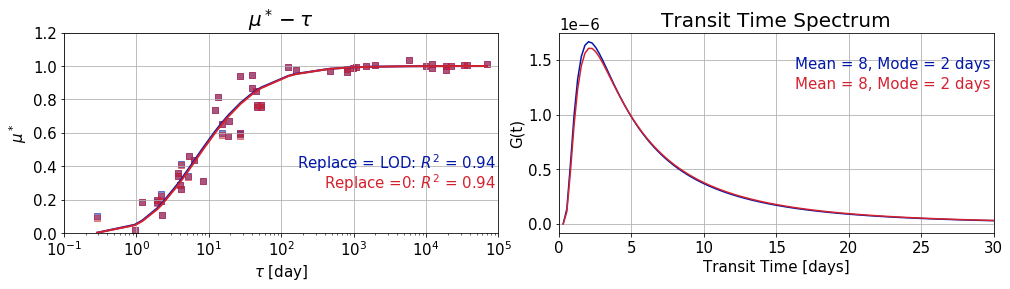

In [32]:
# --------------- start plot with campaign avg bl
title_str = 'Replace = LOD: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau, my_mustar_lod, utbl_lod, my_r2_lod, 
                                        my_gf_lod, my_t_lod, mean_age_lod, mode_age_lod, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add rf08 bl case
title_str = 'Replace =0: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_zero, utbl_zero, my_r2_zero,  
                                        my_gf_zero, my_t_zero, mean_age_zero, mode_age_zero, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
